## Exam 1
## Author: Diego Cardenas
## Special Thanks: Molly, Kiran, Garret, Emily, Colton, Elias



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [3]:
file_location = 'https://joannabieri.com/introdatascience/data/lego_sample.csv'
DF = pd.read_csv(file_location)

In [98]:
show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


**Problem 1**

A) How many variables and observations in the data set<br>
B) What are the names of all the variables<br>
C) For each variable talk about whether you think that variable is Numerical or Categorical and what type of data it is<br>
D) Use describe to get some basic statistics about the numerical data. Comment on at least four things that you learned by looking at these statistic

In [139]:
#A
print("Variables: " , len(DF.columns))
print("Observations: ", len(DF))
DF.shape

Variables:  16
Observations:  75


(75, 16)

In [13]:
#B
(DF.columns)

Index(['item_number', 'set_name', 'theme', 'pieces', 'price', 'amazon_price',
       'year', 'ages', 'pages', 'minifigures', 'packaging', 'weight',
       'unique_pieces', 'size'],
      dtype='object')

### C 
**Item Number** This will be a Categorical because it is not quantitative but more of a name to identify itself   
**Set Name** This is a categorical variable because it is the name of the lego set<br>
**Theme** A categorical variable for the theme names<br>
**Pieces** Numerical because the amount of pieces is quantitative<br>
**Price** Numerical because it is quantitative and continuous<br>
**Amazon Price** Same as Price quantitative and continuous<br>
**Year** Numerical for being continuous<br> 
**Ages** Categorical since we have different groupings of ages depending on what age range they should be in<br>
**Pages** The amount of pages of a build booklet and that makes it continuous<br>
**Minifigures** The amount of minifigures in a lego set which is Discrete<br>
**Packaging** Categorical as it is a Nominal variables<br>
**Weight** Numerical as it is a Continuous variables<br> 
**Unique Pieces** A discrete numerical variable<br>
**Size** A categorical variable since it is a Nominal variable<br>


In [15]:
#D
DF.describe()

,item_number,pieces,price,amazon_price,year,pages,minifigures,unique_pieces
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,65.000000,75.000000
mean,37498.493333,196.453333,32.136667,39.393733,2019.053333,73.213333,2.615385,96.666667
std,20461.267542,213.914121,27.747263,33.301259,0.820239,76.949842,2.133749,89.471018
min,10859.000000,6.000000,4.990000,6.290000,2018.000000,1.000000,1.000000,5.000000
25%,10916.500000,37.000000,9.990000,17.980000,2018.000000,14.000000,1.000000,30.000000
50%,41378.000000,93.000000,19.990000,29.990000,2019.000000,44.000000,2.000000,61.000000
75%,60193.000000,323.500000,39.990000,53.935000,2020.000000,116.000000,3.000000,151.000000
max,60267.000000,897.000000,149.990000,184.990000,2020.000000,389.000000,15.000000,411.000000


1. The average can be seen to be higher for the amazon price then the regular price
2. The lego set with the most pieces is 897 pieces
4. Almost all the variables used are numerical. Maybe my absuption of item_number being categorical may be wrong.
5. My absuption for weight being numerical value would assume it would be part of the describe 

# Problem 2

A) Display (or show) the data frame with only the columns that contain useful categorical information. If you left any columns say why.<br>
B) For each categorical column that you chose above, find the frequencies of the categories. Talk about what you learn from the results of each calculation

In [16]:
DF.dtypes

item_number        int64
set_name          object
theme             object
pieces             int64
price            float64
amazon_price     float64
year               int64
ages              object
pages              int64
minifigures      float64
packaging         object
weight            object
unique_pieces      int64
size              object
dtype: object

In [133]:
cat_DF = DF.select_dtypes(include=['object', 'category'])
show(cat_DF)

Loading ITables v2.5.2 from the internet... (need help?)


These are all entries that use no numerical only input. Like Item_number which may show its item number for its lego set is not considered as an object 

# 2B

In [34]:
setName_DF = DF['set_name'].value_counts()
show(setName_DF)
#The frequency is not needed since there won't be a lego set name that is the same 

Loading ITables v2.5.2 from the internet... (need help?)


In [41]:
theme_DF = DF['theme'].value_counts()
show(theme_DF)
#We see 3 different themes with each coming 25 times each

Loading ITables v2.5.2 from the internet... (need help?)


In [40]:
ages_DF = DF['ages'].value_counts()
show(ages_DF)
#We have 10 different age groupings and how many times they come up

Loading ITables v2.5.2 from the internet... (need help?)


In [134]:
pack_DF = DF['packaging'].value_counts()
show(pack_DF)
#We have 4 different types of packaging 

Loading ITables v2.5.2 from the internet... (need help?)


In [35]:
weight_DF = DF['weight'].value_counts()
show(weight_DF)
# There is 32 different packages that come up so most boxes tend to be different

Loading ITables v2.5.2 from the internet... (need help?)


In [36]:
size_DF = DF['size'].value_counts()
show(size_DF)
# Two types of sizes

Loading ITables v2.5.2 from the internet... (need help?)


# Problem 3

A) Make a scatter plot of the numer of pieces vs the price. Color the data by the lego them and add teh set name as your hover data<br>
B) Answer the three questions by describing what you see in the graph.

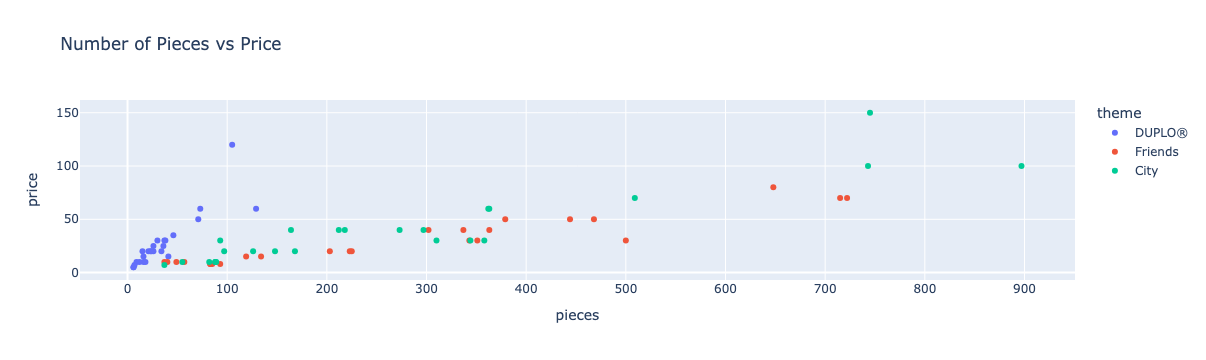

In [122]:
#A
fig = px.scatter(DF, 
                 x = 'pieces',
                 y = 'price',
                 title = 'Number of Pieces vs Price', 
                 hover_data = 'set_name',
                 color = 'theme')
fig.show()

**B**

1. Generally, the amount of pieces correlates with the price. The more expensive it is then the more peices the set will have
2. The most expensive set is the Ocean Exploration Ship that is $149.99
3. Duplo is typically the theme with the least amount of pieces and Friends and City theme typuically are about the same with price and pieces numbers

# Problem 4

A) Create a new column in the data frame that measures the price difference between Amazon and Retail<br>
B) Group the data by Lego Theme and use describe to do statistics on the price difference column you created in part (a). Comment on at least four things that you learned by looking at these statistics<br>
C) Make a histogram of the price difference and color the bars by the Lego Theme

In [123]:
#A
DF['price_diff'] = DF['amazon_price'] - DF['price']
show(DF['price_diff'].describe())
#If the calculation is positive then the amazon price is more expensive then retail

Loading ITables v2.5.2 from the internet... (need help?)


In [61]:
theme_desc = DF.groupby(by=['theme'])['price_diff'].describe()
show(theme_desc)

Loading ITables v2.5.2 from the internet... (need help?)


1. The most money saved on a lego set is 13.99 if bought on amazon.
2. $115 is the most overpriced lego set compared from retail
3. On average buying on amazon is not the best deal
4. Over 50% you do not save any money when buying on amazon

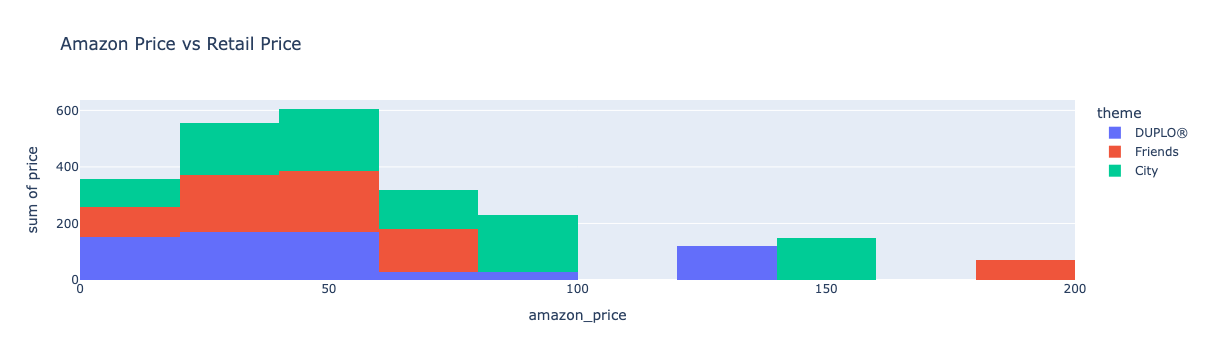

In [124]:
fig = px.histogram(DF,
                  x = 'amazon_price',
                   y = 'price',
                  color = 'theme',
                  title = 'Amazon Price vs Retail Price')
fig.show()

# Problem 5

A) What was the most expensive set based on Retail price? Show the full data frame information for this observation. Comment on your results comparing Amazon and Retail, number of pieces or minifigs, etc <br>
B) What was the most expensive set based on Amazon price? Show the full data frame information for this observation<br>
C) How many sets were above $100 on either Retail or Amazon? Show the full data frame information for these observations. Comment on any observations for these sets.

In [130]:
my_col = ['set_name','price', 'amazon_price', 'pieces', 'minifigures']
show(priceDF.sort_values(by='price',ascending=False))
#We see that Ocean Exploration ship is the most expensive retail set

Loading ITables v2.5.2 from the internet... (need help?)


In [132]:
my_col = ['set_name','price', 'amazon_price', 'pieces', 'minifigures']
show(DF[my_col].sort_values(by='amazon_price',ascending=False))
#We see that Friendship House is the most expensive lego set in Amazon

Loading ITables v2.5.2 from the internet... (need help?)


In [78]:
mask100 = (DF['price'] >= 100) | (DF['amazon_price'] >= 100)
price100DF = DF[mask100]
show(price100DF)
# There are only 3 sets in the data that are over $100 but for one set it is less than $100 for the retail but goes up to 
# $184.99 as the amazon price

Loading ITables v2.5.2 from the internet... (need help?)


# Problem 6

**6A)** On average is the price of Legos increasing, decreasing, or staying the same over the three years?

In [85]:
my_col = ['price', 'amazon_price', 'theme', 'year', 'price_diff']
mask_yr18 = (DF['year'] == 2018)
DF_yr18 = DF[mask_yr18]
show(DF_yr18[my_col].describe())


Loading ITables v2.5.2 from the internet... (need help?)


In [86]:
my_col = ['price', 'amazon_price', 'theme', 'year', 'price_diff']
mask_yr19 = (DF['year'] == 2019)
DF_yr19 = DF[mask_yr19]
show(DF_yr19[my_col].describe())

Loading ITables v2.5.2 from the internet... (need help?)


In [87]:
my_col = ['price', 'amazon_price', 'theme', 'year', 'price_diff']
mask_yr20 = (DF['year'] == 2020)
DF_yr20 = DF[mask_yr20]
show(DF_yr20[my_col].describe())

Loading ITables v2.5.2 from the internet... (need help?)


**We can see that the average was about the same from 2018 to 2019 but then jumped by a whole $10 more in 2020 compared to 2018 and 2019**

**6B)** On average are the number of pieces increase, decreasing, or staying the same over the three years

In [92]:
my_col = ['year', 'pieces']
mask_yr18 = (DF['year'] == 2018)
DF_yr18 = DF[mask_yr18]
show(DF_yr18[my_col].describe())

Loading ITables v2.5.2 from the internet... (need help?)


In [93]:
my_col = ['year', 'pieces']
mask_yr19 = (DF['year'] == 2019)
DF_yr19 = DF[mask_yr19]
show(DF_yr19[my_col].describe())

Loading ITables v2.5.2 from the internet... (need help?)


In [91]:
my_col = ['year', 'pieces']
mask_yr20 = (DF['year'] == 2020)
DF_yr20 = DF[mask_yr20]
show(DF_yr20[my_col].describe())

Loading ITables v2.5.2 from the internet... (need help?)


**We see that the average amount of pieces are steadily increasing through the year of 2018 - 2020**

**6C)** Which set has the most minifigures and how many sets have zero or an unknown number of minifigures?

In [140]:
my_col = ['set_name', 'minifigures','theme']
#miniFigDF = DF[my_col].groupby(by='minifigures').max()
show(miniFigDF.sort_values(by='minifigures', ascending=False))
# The lego set with the most minifigures is People Pack - Outdoor Adventures

Loading ITables v2.5.2 from the internet... (need help?)


In [99]:
zeroCount = DF['minifigures'].isnull().sum()
print(f"The number of sets with no minifigures is {zeroCount}")

The number of sets with no minifigures is 10


# Problem 7

# I want to buy some Legos for my 6 year old cousin, which Lego set is the best deal?
1. First you will have to describe in words what makes a good deal. Is is price per piece, price per minifig, price per number of unique pieces, price per page, is it some combination of these things? Should you use Retail or Amazon Price?
2. Then you will have to decide what age ranges are appropriate and select just that data
3. Then you will need to do a calculation and add that column to your data frame.
4. Finally sort your deal column to find the best purchase

#### For my 6 year old I believe it is best to get a lego set that is price per minifig due to the fact he would have more fun with the different little people to play with which my goal is to find with 3 or more. For a child getting a lego set that is looking for the best price per piece could be worth looking at because if we can get more pieces for the least amount of money can be best as my cousin may lose the pieces very easily. So a set that is less than a 25 cents a piece can be worth considering. Retail is the price I would look for because of how more often it is more expensive to buy lego sets off of Amazon. 

#### I should get my cousin a set that is at his age range or older so he can enjoy it much longer and not be grown out of it

'item_number', 'set_name', 'theme', 'pieces', 'price', 'amazon_price',
       'year', 'ages', 'pages', 'minifigures', 'packaging', 'weight',
       'unique_pieces', 'size


Ages_6+	20
Ages_5+	13
Ages_2+	10
Ages_2-5	8
Ages_5-12	7
Ages_6-12	5
Ages_1½+	4
Ages_1½-3	3
Ages_4+	2
Ages_7+	2

In [121]:
DF['pricePerPiece'] = DF['price'] / DF['pieces'] #New Variable: pricePerPiece
my_col = ['price', 'pieces', 'pricePerPiece', 'ages', 'set_name','minifigures']  #Variable columns I want to see in my data for best lego set

mask_age = (DF['ages'] == 'Ages_6+') | (DF['ages'] == 'Ages_6-12') | (DF['ages'] == 'Ages_7+') #Ages above 6 years old
maskAgeDF = DF[mask_age]  #Mask of Age

maskPPP = (maskAgeDF['pricePerPiece'] < .25) # less than 25 cents per peice
DFpppAge = maskAgeDF[maskPPP] ##Mask mixed with PricePerPiece and Age

maskMinifig = DFpppAge['minifigures'] >= 3 #More or equal to 3 minifigures must be in a lego set
mini_ppp_ageDF = DFpppAge[maskMinifig] #mask of Price per Piece, Age, and minifigures

show(mini_ppp_ageDF[my_col].sort_values(by='pricePerPiece', ascending=True)) #sort by lowest pricePerPiece of my criteria

Loading ITables v2.5.2 from the internet... (need help?)


There are 7 lego sets that fit within my critiera of lego sets for my cousin. Almost all lego sets having a a high amount of pieces for my cousin that will succesful them. The most  expensive set is \\$149.99 but all the other sets are under \\$100 so if I were to set a budget of how much I would spend that is less than \\$100 then I will still have 6 other lego sets to pick from. I would choose Tuning Workshop due to being \\$100 with a price per piece being about 11 cents  and having 7 minifigures. It is also meant for his age and old with almost 900 pieces so it would be perfect for him to last him lots of fun and distraction for a long period of time.